In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import test_cuda

device = test_cuda.device

device name: NVIDIA GeForce RTX 2060 SUPER
device = cuda


In [2]:
torch.manual_seed(25)
weight = 0.7
bias = 0.3

start = 0
end = 5
step = 0.02
X = torch.arange(start,end,step).unsqueeze(1)
y = weight * X + bias + 0.1*torch.randn(X.shape)

In [3]:
train_split  = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.grid()

  # Show the legend
  plt.legend(prop={"size": 14});

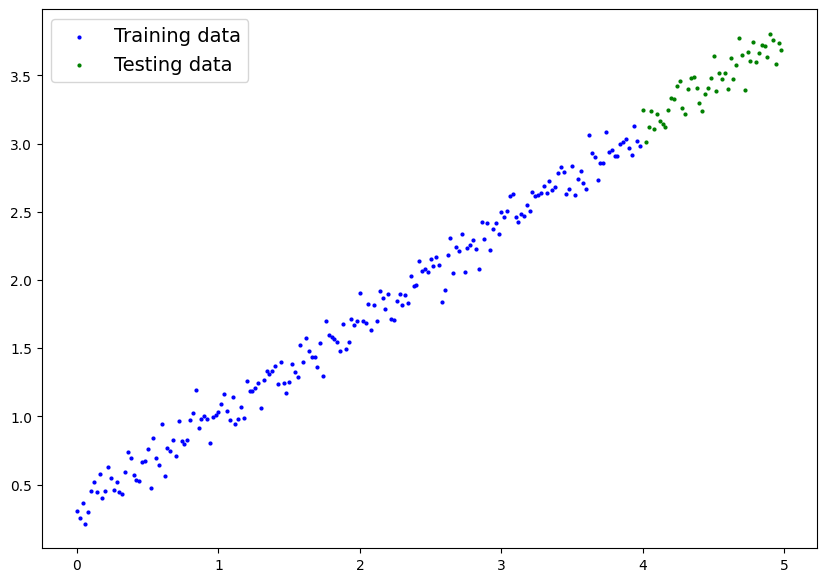

In [5]:
plot_predictions()

In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


OrderedDict([('weights', tensor([1.1781])), ('bias', tensor([0.1056]))])


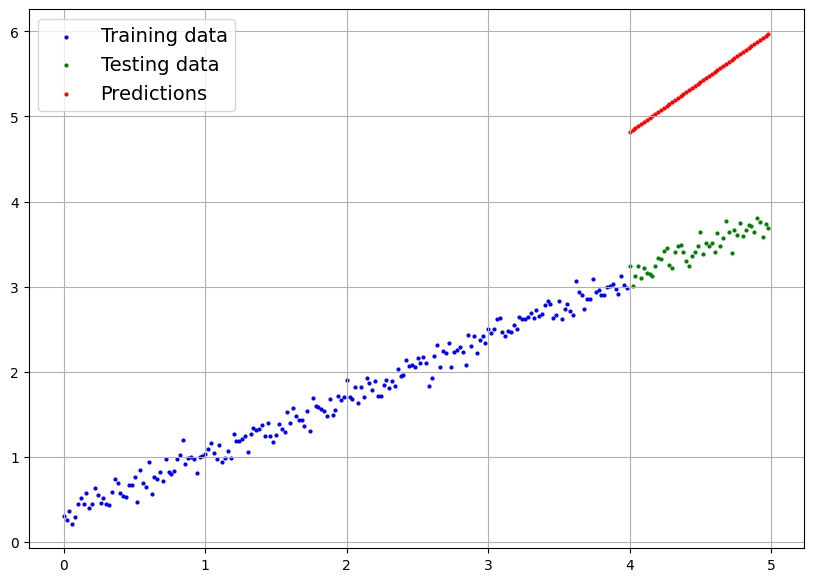

In [7]:
torch.manual_seed(25)

model_0 =  LinearRegressionModel()

print(model_0.state_dict())

with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [8]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)


points_plot = 20
epochs = 10000
interval = int(epochs/points_plot)


# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()



  if (epoch % interval == 0) and (epoch>0):
    with torch.inference_mode():
      test_pred = model_0(X_test)

      test_loss = loss_fn(test_pred,y_test.type(torch.float))

      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())


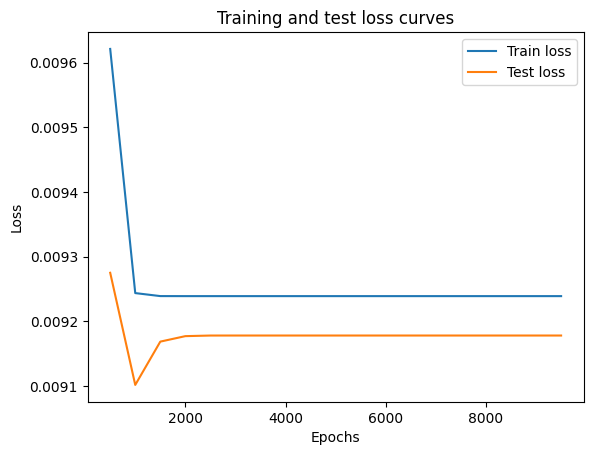

In [9]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

OrderedDict([('weights', tensor([0.6939])), ('bias', tensor([0.3201]))])

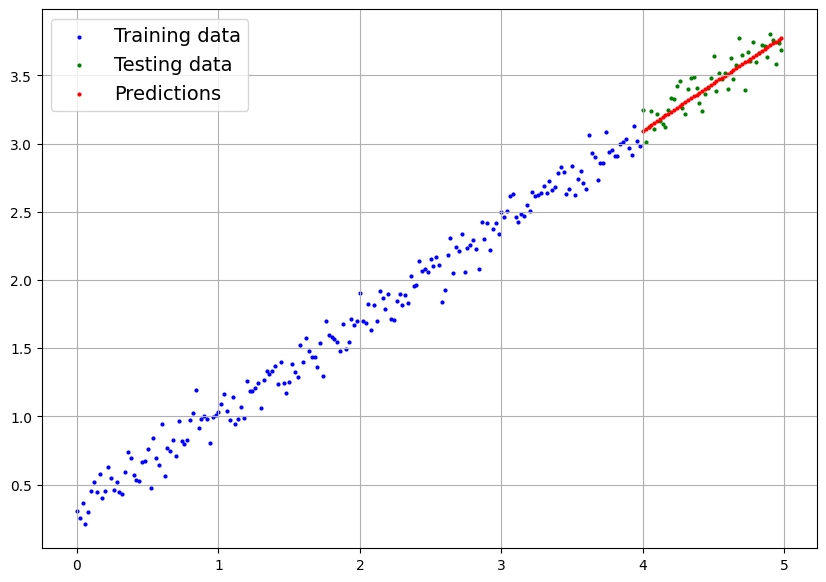

In [10]:
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(X_test)
plot_predictions(predictions=y_pred)
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5036]])), ('linear_layer.bias', tensor([-0.6142]))])


OrderedDict([('linear_layer.weight', tensor([[0.6975]])),
             ('linear_layer.bias', tensor([0.3110]))])

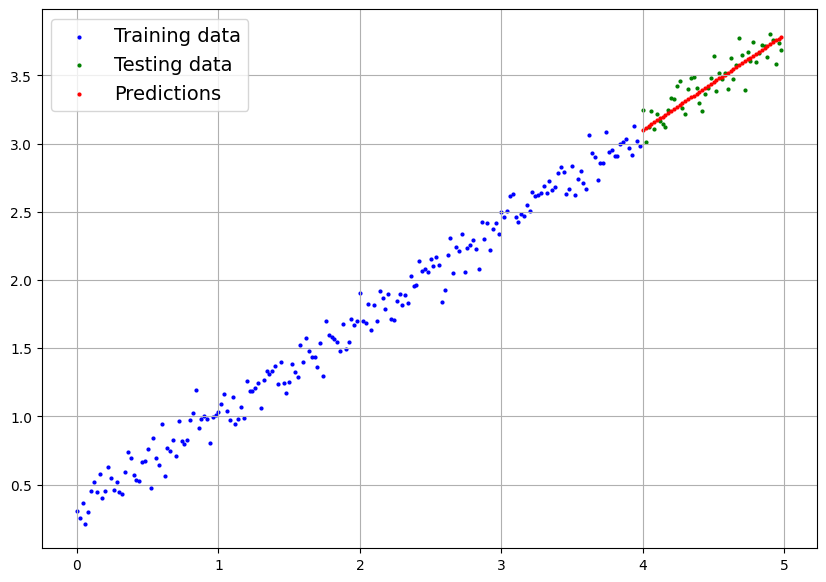

In [12]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)

    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(25)
model_1 = LinearRegressionModelV2()
print(model_1.state_dict())

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.01)


points_plot = 20
epochs = 1000
interval = int(epochs/points_plot)

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    
    if (epoch % interval == 0) and (epoch>0):
        with torch.inference_mode():
            test_pred = model_1 (X_test)

            test_loss = loss_fn(test_pred,y_test.type(torch.float))

            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

model_1.eval()
with torch.inference_mode():
  y_pred = model_1(X_test)
plot_predictions(predictions=y_pred)
model_1.state_dict()